In [2]:
# THIS IS THE REPRO IPYNB FOR MCP_MCD CONFIDNET PAPER!!!
import pandas as pd
import os
# in_path_list = [
#                 "/Users/Paul/research/files/analysis/full_log/analysis_metrics.csv",
#                 "/Users/Paul/research/files/analysis/full_log/analysis_metrics 2.csv",
#                 "/Users/Paul/research/files/analysis/full_log/analysis_metrics 3.csv"]

# in_path_list = [
#                 "//Users/Paul/research/files/analysis/repro_mcd_mcp/metrics2.csv",
#                 "/Users/Paul/research/files/analysis/repro_mcd_mcp/metrics3.csv",
#                 "/Users/Paul/research/files/analysis/repro_mcd_mcp/metrics4.csv",
#                 "/Users/Paul/research/files/analysis/full_log/full_log_metrics.csv",
#                 "/Users/Paul/research/files/analysis/full_log/full_log_metrics 2.csv",
#                 "/Users/Paul/research/files/analysis/full_log/full_log_metrics 3.csv"]
dir_path = "/Users/Paul/research/files/analysis/final_repro"
in_path_list = [os.path.join(dir_path, x) for x in os.listdir(dir_path)]
print(in_path_list)

['/Users/Paul/research/files/analysis/final_repro/analysis_metrics.csv', '/Users/Paul/research/files/analysis/final_repro/analysis_metrics 3.csv', '/Users/Paul/research/files/analysis/final_repro/analysis_metrics 2.csv', '/Users/Paul/research/files/analysis/final_repro/analysis_metrics 5.csv', '/Users/Paul/research/files/analysis/final_repro/analysis_metrics 4.csv']


In [3]:
dflist = []
for p in in_path_list:
 tmp_df = pd.read_csv(p)
 tmp_df["name"] = p.split("/")[-1]
 dflist.append(tmp_df)

df = pd.concat(dflist)

In [4]:
# df_confid = df.groupby("confid", as_index=True).mean().round(3)
# select_df =df_confid[(df_confid.index=="det_mcp") | (df_confid.index == "mcd_pe")]
# select_df

df_confid = df.round(3)
select_df =df_confid[(df_confid.confid=="det_mcp") | (df_confid.confid == "mcd_pe")]
select_df = select_df.drop("name", axis=1)
select_df = select_df.drop("model", axis=1)
select_df = select_df.set_index("confid")
select_df

,Unnamed: 0,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr
confid,,,,,,,,,,,,
det_mcp,0,0.954,0.022,0.072,0.929,0.995,0.496,0.238,0.023,4.257,5.347,0.308
mcd_pe,3,0.955,0.018,0.070,0.928,0.995,0.431,0.422,0.035,4.671,5.717,0.361
det_mcp,0,0.955,0.018,0.068,0.931,0.995,0.481,0.247,0.014,4.265,5.287,0.284
mcd_pe,3,0.956,0.017,0.069,0.927,0.995,0.436,0.298,0.047,4.365,5.352,0.353
det_mcp,0,0.955,0.020,0.070,0.927,0.995,0.468,0.220,0.018,4.334,5.354,0.305
mcd_pe,3,0.955,0.018,0.070,0.924,0.995,0.413,0.379,0.043,4.502,5.517,0.375
det_mcp,0,0.953,0.019,0.072,0.927,0.995,0.476,0.126,0.016,4.612,5.737,0.320
mcd_pe,3,0.954,0.018,0.073,0.926,0.995,0.437,0.252,0.049,4.625,5.721,0.352
det_mcp,0,0.955,0.019,0.069,0.929,0.995,0.474,0.234,0.017,4.282,5.316,0.306


In [5]:
# , "failap_err", "fpr@95tpr", "e-aurc", "aurc"
tr_df = select_df.transpose()
tr_df = tr_df[tr_df.index != "Unnamed: 0"]
tr_df["repro_mcp"] = [0, 0, 0, 0.932, 0, 0.4818, 0, 0, 4.38, 5.44, 0.3128]
tr_df["repro_mcd_pe"] = [0, 0, 0, 0.9285, 0, 0.4387, 0, 0, 4.57, 5.68, 0.366]
tr_df["myrepro_mcp"] = [0.955, 0, 0, 0.9260, 0, 0.451, 0, 0, 4.46, 5.51, 0.324]
tr_df["myrepro_mcd_pe"] = [0.954, 0, 0, 0.927, 0, 0.445, 0, 0, 4.62, 5.69, 0.3255]
tr_df["myrepro_mcd_pe2"] = [0.955, 0, 0, 0.9285, 0, 0.450, 0, 0, 4.39, 5.41, 0.317]
tr_df["myrepro_mcp2"] = [0.955, 0, 0, 0.9280, 0, 0.450, 0, 0, 4.21, 5.21, 0.318]

In [6]:
print(tr_df.columns)
print([c for c in tr_df.columns if "pe" in c])
tr_df[set([c for c in tr_df.columns if "mcp" in c])]

Index(['det_mcp', 'mcd_pe', 'det_mcp', 'mcd_pe', 'det_mcp', 'mcd_pe',
       'det_mcp', 'mcd_pe', 'det_mcp', 'mcd_pe', 'repro_mcp', 'repro_mcd_pe',
       'myrepro_mcp', 'myrepro_mcd_pe', 'myrepro_mcd_pe2', 'myrepro_mcp2'],
      dtype='object', name='confid')
['mcd_pe', 'mcd_pe', 'mcd_pe', 'mcd_pe', 'mcd_pe', 'repro_mcd_pe', 'myrepro_mcd_pe', 'myrepro_mcd_pe2']


confid,repro_mcp,myrepro_mcp2,myrepro_mcp,det_mcp,det_mcp,det_mcp,det_mcp,det_mcp
accuracy,0.0000,0.955,0.955,0.954,0.955,0.955,0.953,0.955
nll,0.0000,0.000,0.000,0.022,0.018,0.020,0.019,0.019
brier_score,0.0000,0.000,0.000,0.072,0.068,0.070,0.072,0.069
failauc,0.9320,0.928,0.926,0.929,0.931,0.927,0.927,0.929
failap_suc,0.0000,0.000,0.000,0.995,0.995,0.995,0.995,0.995
failap_err,0.4818,0.450,0.451,0.496,0.481,0.468,0.476,0.474
mce,0.0000,0.000,0.000,0.238,0.247,0.220,0.126,0.234
ece,0.0000,0.000,0.000,0.023,0.014,0.018,0.016,0.017
e-aurc,4.3800,4.210,4.460,4.257,4.265,4.334,4.612,4.282
aurc,5.4400,5.210,5.510,5.347,5.287,5.354,5.737,5.316


<AxesSubplot:>

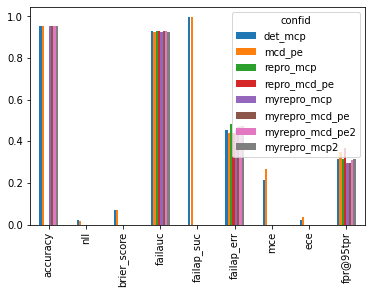

In [94]:
£tr_df[(tr_df.index != "e-aurc") & (tr_df.index != "aurc")].plot.bar()

<AxesSubplot:>

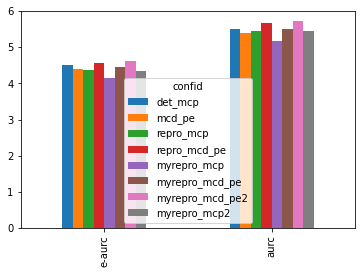

In [95]:
tr_df[(tr_df.index == "e-aurc") | (tr_df.index == "aurc")].plot.bar()



